# **How Much of the World Has Access to the Internet?**
A DataCamp competition

**Background**

You work for a policy consulting firm. One of the firm's principals is preparing to give a presentation on the state of internet access in the world. She needs your help answering some questions about internet accessibility across the world.

**The data**

The research team compiled the following tables:
- **internet**
    - **Entity:** The name of the country, region, or group.
    - **Code:** Unique id for the country (null for other entities).
    - **Year:** Year from 1990 to 2019.
    - **Internet_usage:** The share of the entity's population who have used the Internet in the last three months.
- **people:**
    - **Entity:** The name of the country, region, or group.
    - **Code:** Unique id for the country (null for other entities).
    - **Year:** Year from 1990 to 2020.
    - **Users:** The number of people who have used the internet in the last three months for that country, region, or group.
- **broadband:**
    - **Entity:** The name of the country, region, or group.
    - **Code:** Unique id for the country (null for other entities).
    - **Year:** Year from 1998 to 2020.
    - **Broadband_Subscriptions:** The number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group.
    
**Challenge**

Create a report to answer the principal's questions. Include:
- What are the top 5 countries with the highest internet use (by population share)?
- How many people had internet access in those countries in 2019?
- What are the top 5 countries with the highest internet use for each of the following regions: "Africa Eastern and Southern", "Africa Western and Central", "Latin America & Caribbean", "East Asia & Pacific", "South Asia", "North America", "European Union"?
- Create a visualization for those five regions' internet usage over time.
- What are the 5 countries with the most internet users?
- What is the correlation between internet usage (population share) and broadband subscriptions for 2019?
- Summarize your findings.

In [1]:
#!pip install pandas==2.1.4
#!pip install numpy==1.26.3
#!pip install matplotlib==3.8.2
#!pip install seaborn==0.13.1
#!pip install lxml==5.1.0

In [2]:
import pandas as pd

broadband = pd.read_csv("data/broadband.csv")
internet = pd.read_csv("data/internet.csv")
people = pd.read_csv("data/people.csv")

**What are the top 5 countries with the highest internet use (by population share)?**

In [3]:
internet_by_usage = internet[internet["Year"] == 2019].sort_values(by="Internet_Usage", ascending=False)
internet_by_usage.head()

,Entity,Code,Year,Internet_Usage
470,Bahrain,BHR,2019,99.701504
5388,Qatar,QAT,2019,99.652804
3416,Kuwait,KWT,2019,99.542676
6716,United Arab Emirates,ARE,2019,99.149998
1552,Denmark,DNK,2019,98.046435


We get the internet usage for 2019, and then we find the 5 countries with the highest internet use. By that, we get that those countries were:
1. Bahrain with 99.70%.
2. Qatar with 99.65%.
3. Kuwait with 99.54%.
4. United Arab Emirates with 99.15%.
5. Denmark with 98.05%.

**How many people had internet access in those countries in 2019?**

In [4]:
top_5_usage = internet_by_usage.Entity.head().to_list()
people[(people["Entity"].apply(lambda x: x in top_5_usage)) & (people["Year"] == 2019)][["Entity","Users"]]

,Entity,Users
477,Bahrain,1489735
1565,Denmark,5682653
3091,Kuwait,4420795
4728,Qatar,2797495
5986,United Arab Emirates,9133361


For 2020, we get that:
1. **Bahrain** had **1,489,735** people with intenet access.
2. **Denmark** had **5,682,653** people with intenet access.
3. **Kuwait** had **4,420,795** people with intenet access.
4. **Qatar** had **2,797,495** people with intenet access.
5. **United Arab Emirates** had **9,133,361** people with intenet access.

**What are the top 5 countries with the highest internet use for each of the following regions: "Africa Eastern and Southern", "Africa Western and Central", "Latin America & Caribbean", "East Asia & Pacific", "South Asia", "North America", "European Union"?**

In [5]:
countries_per_region = pd.read_html("https://statisticstimes.com/geography/countries-by-continents.php")[2]
countries_per_region["Region 1"].unique()

array(['Southern Asia', 'Northern Europe', 'Southern Europe',
       'Northern Africa', 'Polynesia', 'Middle Africa', 'Caribbean',
       'Antarctica', 'South America', 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Central America', 'Western Africa', 'Northern America',
       'Southern Africa', 'Eastern Africa', 'South-eastern Asia',
       'Eastern Asia', 'Melanesia', 'Micronesia', 'Central Asia'],
      dtype=object)

In [6]:
internet_by_usage_with_codes = pd.merge(left=internet_by_usage, right=countries_per_region, how="left", left_on="Code", right_on="ISO-alpha3 Code")[["Entity", "Code", "Year", "Internet_Usage", "Region 1", "Region 2"]]

In [7]:
aes = internet_by_usage_with_codes[internet_by_usage_with_codes["Region 1"].isin(["Southern Africa", "Eastern Africa"])].head()
print("For Southern and Eastern Africa")
display(aes)
awc = internet_by_usage_with_codes[internet_by_usage_with_codes["Region 1"].isin(["Western Africa", "Central Africa"])].head()
print("For Western and Central Africa")
display(awc)
lac = internet_by_usage_with_codes[internet_by_usage_with_codes["Region 2"] == "Latin America and the Caribbean"].head()
print("For Latin America and Caribbean")
display(lac)
eap = internet_by_usage_with_codes[internet_by_usage_with_codes["Region 1"].isin(["Australia and New Zealand", "Eastern Asia"])].head()
print("For Eastern Asia and Pacific")
display(eap)
sas = internet_by_usage_with_codes[internet_by_usage_with_codes["Region 1"] == "Southern Asia"].head()
print("For South Asia")
display(sas)
nam = internet_by_usage_with_codes[internet_by_usage_with_codes["Region 1"] == "Northern America"].head()
print("For North America")
display(nam)
eur = internet_by_usage_with_codes[internet_by_usage_with_codes["Region 1"].apply(lambda x: "europe" in x.lower())].head()
print("For Europe")
display(eur)
cont_union = pd.concat([aes, awc, lac, eap, sas, nam, eur])

For Southern and Eastern Africa


,Entity,Code,Year,Internet_Usage,Region 1,Region 2
66,Mauritius,MUS,2019,63.999898,Eastern Africa,Sub-Saharan Africa
73,Kenya,KEN,2019,22.565119,Eastern Africa,Sub-Saharan Africa


For Western and Central Africa


,Entity,Code,Year,Internet_Usage,Region 1,Region 2


For Latin America and Caribbean


,Entity,Code,Year,Internet_Usage,Region 1,Region 2
39,Costa Rica,CRI,2019,81.202596,Central America,Latin America and the Caribbean
47,Uruguay,URY,2019,76.949552,South America,Latin America and the Caribbean
54,Puerto Rico,PRI,2019,70.874321,Caribbean,Latin America and the Caribbean
56,Mexico,MEX,2019,70.069910,Central America,Latin America and the Caribbean
61,Paraguay,PRY,2019,68.517628,South America,Latin America and the Caribbean


For Eastern Asia and Pacific


,Entity,Code,Year,Internet_Usage,Region 1,Region 2
6,South Korea,KOR,2019,96.157583,Eastern Asia,NaN
14,Hong Kong,HKG,2019,91.743400,Eastern Asia,NaN
24,Macao,MAC,2019,86.467926,Eastern Asia,NaN
71,Mongolia,MNG,2019,51.079994,Eastern Asia,NaN


For South Asia


,Entity,Code,Year,Internet_Usage,Region 1,Region 2
74,Pakistan,PAK,2019,17.070902,Southern Asia,NaN


For North America


,Entity,Code,Year,Internet_Usage,Region 1,Region 2


For Europe


,Entity,Code,Year,Internet_Usage,Region 1,Region 2
4,Denmark,DNK,2019,98.046435,Northern Europe,NaN
5,Norway,NOR,2019,98.000004,Northern Europe,NaN
9,Sweden,SWE,2019,94.493443,Northern Europe,NaN
10,Netherlands,NLD,2019,93.288591,Western Europe,NaN
11,Switzerland,CHE,2019,93.146087,Western Europe,NaN


We can see that there's no data for some regions at 2019.

**Create a visualization for those five regions' internet usage over time.**

In [8]:
best_countries_at_2019 = cont_union.Entity.to_list()
best_countries_hist = pd.merge(left=internet[internet.Entity.isin(best_countries_at_2019)], right=countries_per_region, how="left", left_on="Code", right_on="ISO-alpha3 Code")[["Entity", "Code", "Year", "Internet_Usage", "Region 1", "Region 2"]]

In [9]:
best_countries_hist["Region 1"].replace(["Northern Europe", "Western Europe"], "Europe", inplace=True)
best_countries_hist["Region 1"].replace(["Central America", "South America", "Caribbean"], "Latin America and Caribbean", inplace=True)

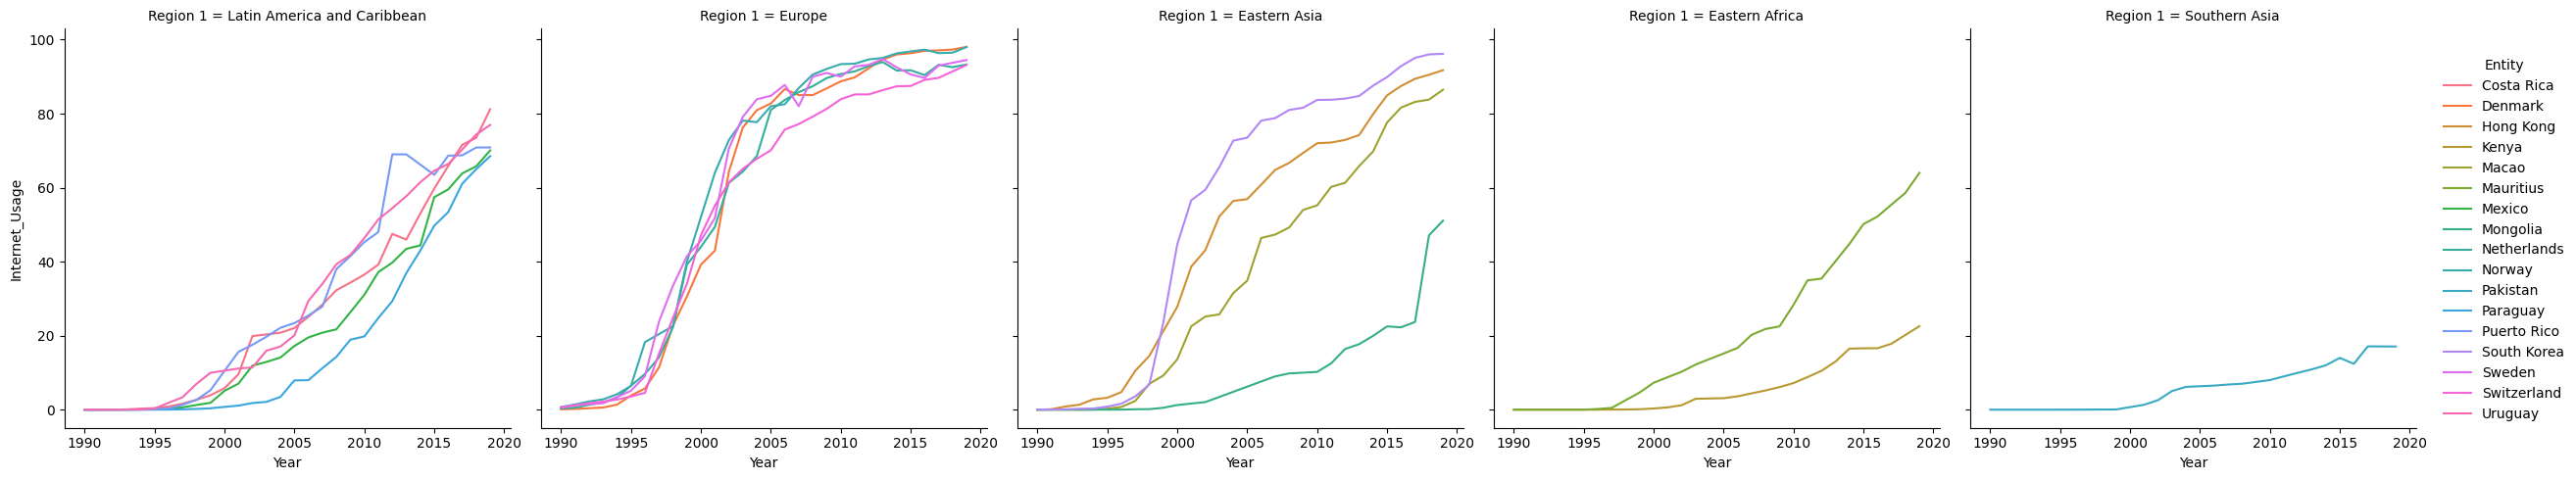

In [10]:
import seaborn as sns

sns.relplot(data = best_countries_hist,
            x = "Year",
            y = "Internet_Usage",
            hue = "Entity",
            col = "Region 1",
            kind = "line")

**What are the 5 countries with the most internet users?**

In [11]:
import numpy as np

top5_users_num = people[(people.Year == 2020) & (people.Entity.apply(lambda x: x not in "World")) & (people.Code.apply(lambda x: x is not np.nan))].sort_values("Users", ascending=False).reset_index(drop=True).head()
top5_users_num

,Entity,Code,Year,Users
0,China,CHN,2020,1003218650
1,India,IND,2020,600446441
2,United States,USA,2020,305371298
3,Brazil,BRA,2020,173419624
4,Indonesia,IDN,2020,146059763


The top 5 countries with most internet users in 2020 are:
- **China** with **1.003.218.650**.
- **India** with **600.446.442**.
- **United States** with **305.371.298**.
- **Brazil** with **173.419.624**.
- **Indonesia** with **146.059.763**.

**What is the correlation between internet usage (population share) and broadband subscriptions for 2019?**

Correlation: 0.5590077105170114


<Axes: xlabel='Internet_Usage', ylabel='Broadband_Subscriptions'>

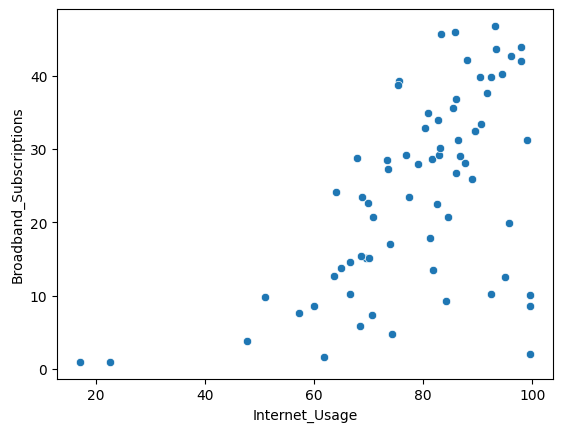

In [12]:
internet_by_usage_2019 = internet[internet.Year == 2019]
broadband_2019 = broadband[broadband.Year == 2019]
internet_broadband = pd.merge(internet_by_usage_2019, broadband_2019, "inner", ["Entity", "Code", "Year"])
correlation = internet_broadband["Internet_Usage"].corr(internet_broadband["Broadband_Subscriptions"])
print("Correlation:", correlation)

sns.scatterplot(internet_broadband,
                x = "Internet_Usage",
                y = "Broadband_Subscriptions")

**Summarize your findings.**

- Asian countries were found to stand out in terms of the percentage of internet usage, with only Denmark entering the top 5 as a non-Asian country.
- For the year 2019, there is no data for countries in certain regions, so certain regions do not show information on internet usage.
- It is possible to observe that internet usage has increased considerably in recent years. This growth is occurring in developing countries, while in first-world countries, it is a development that occurred approximately between the years 2000 and 2005.
- The countries with the highest number of internet users are China, India, the USA, Brazil, and Indonesia, each being countries with a large population. However, there is a notable difference between China and India, despite having similar populations.
- Based on the correlation found, it is evident that both variables are correlated, indicating that internet usage is related to the number of broadband subscribers.